# Spatial Biology

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')

### Sampling cells 

In [3]:
from utils import deserialize
import ipdb
import os
import random
import numpy as np
import networkx as nx

random.seed(0)

In [4]:
data_path = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final"

In [5]:
# raw_dict, embed_dict, concat_dict = {}, {}, {}
# print("examples:", len(os.listdir(data_path)))
# celltype_dict = {}

# for G_name in os.listdir(data_path):
#     G = os.path.join(data_path, G_name)
#     G = deserialize(G)

#     data_id = int(G_name.split("S")[1].split(".")[0])
#     # sampling
#     try:
#         node_ids = random.sample(list(G.nodes),40)
#     except ValueError: #l == 1:
#         node_ids = [0] 
    
#     for node in node_ids:
#         raw = G.nodes[node]["raw"]
#         embed = G.nodes[node]["emb"]
#         celltype = G.nodes[node]["cell_type"]
#         key = str(data_id) + "_" + str(node)
#         raw_dict[key] = raw
#         embed_dict[key] = embed
#         concat_dict[key] = np.concatenate((raw, embed), axis=0)
#         celltype_dict[key] = celltype
        


examples: 254


In [8]:
from utils import serialize, deserialize

In [9]:
save_path_meta = "/scr/biggest/gmachi/datasets/celldive_lung" # old path

save_path_embed = os.path.join(save_path_meta, "embed_sample_final.obj")
# serialize(embed_dict, save_path_embed)
embed_dict = deserialize(save_path_embed)

save_path_raw = os.path.join(save_path_meta, "raw_sample_final.obj")
# serialize(raw_dict, save_path_raw)
raw_dict = deserialize(save_path_raw)

save_path_concat = os.path.join(save_path_meta, "concat_sample_final.obj")
# serialize(concat_dict, save_path_concat)
concat_dict = deserialize(save_path_concat)

save_path_celltype = os.path.join(save_path_meta, "celltype_sample_final.obj")
# serialize(celltype_dict, save_path_celltype)
celltype_dict = deserialize(save_path_celltype)

In [10]:
len(raw_dict), len(embed_dict), len(concat_dict), len(celltype_dict)

(10160, 10160, 10160, 10160)

### Label dictionary

In [11]:
# import pandas as pd
# labels_csv = "/scr/biggest/gmachi/datasets/celldive_lung/processed/labels.csv"
# labels_df = pd.read_csv(labels_csv)
# label_dict = dict(zip(labels_df.REGION_ID.to_numpy(), labels_df.survival5.to_numpy()))

# serialize(label_dict, "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj")

In [24]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
celltype_path = "/scr/biggest/gmachi/datasets/celldive_lung/celltype_sample_final.obj"

### Exploring K: the number of concepts
Here is an example of using the elbow method. In practice, the elbow is not optimally informative for downstream tasks.

In [25]:
from k2 import K2Processor

In [26]:
proc_args = {"datatype":"cells",
        "k":20,
        "quantizer_type": "kmeans",
        "embeddings_path": "/scr/biggest/gmachi/datasets/celldive_lung/embed_sample_final.obj",
        "embeddings_type": "multidict",
        "mapping_path": None,
        "sample_size": 10160,
        "sample_scheme": "random",
        "dataset_path": None,
        "verbosity": "full",
        "so_dict_path": None,
        "mapping_path": label_path,
        "marker_flag": "labels"}

In [27]:
import matplotlib.pyplot as plt
ks = [6,7,8,9,10,11,12,13,14,15]

In [28]:
inertias = []
for k in ks:
    proc_args["k"] = k
    proc_embed = K2Processor(proc_args)
    proc_embed.fit_quantizer()
    inertias.append(proc_embed.quantizer.inertia_)

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2
Embeddings path provided, loading 

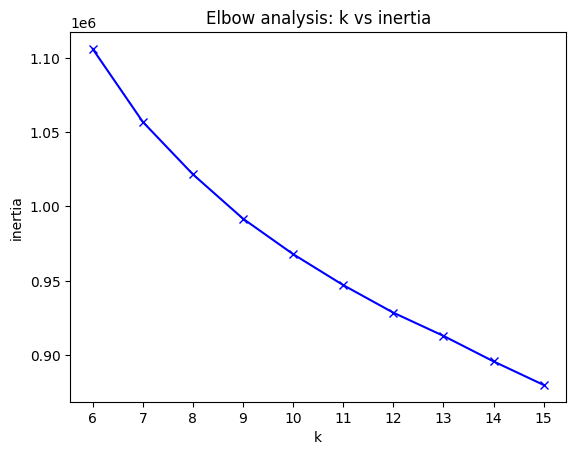

In [29]:
plt.figure()
plt.plot(ks, inertias, 'bx-')
plt.title("Elbow analysis: k vs inertia")
plt.xlabel("k")
plt.xticks(ks)
plt.ylabel("inertia")
plt.show()

No real elbow has formed in the desired range of K values. We arbitrarily pick 9 for further viz.

### Visualize choice of k

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2


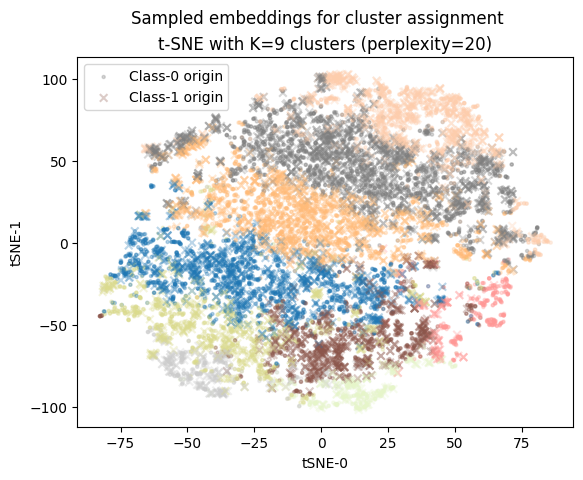

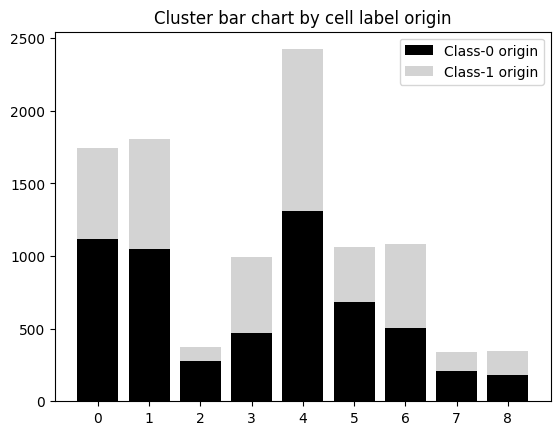

In [30]:
proc_args["k"] = 9
proc_args["mapping_path"] = label_path
proc_args["marker_flag"] = "labels"
proc_embed = K2Processor(proc_args)
proc_embed.fit_quantizer()
proc_embed.visualize_quantizer()

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2


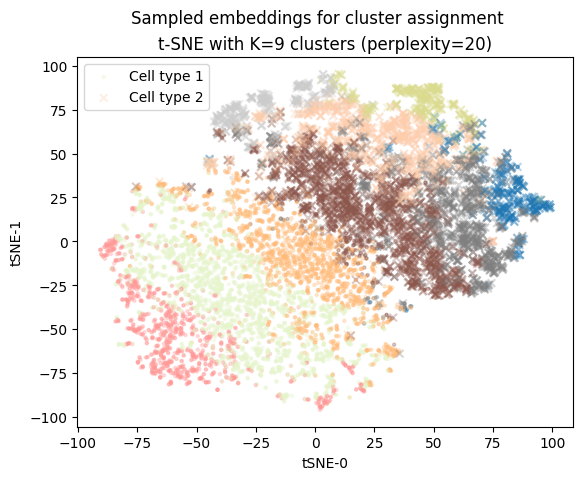

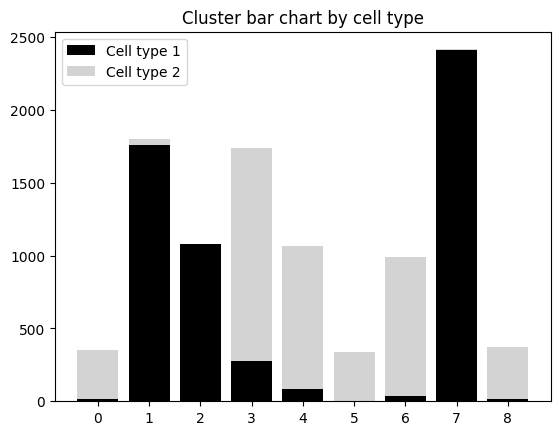

In [31]:
proc_args["k"] = 9
proc_args["mapping_path"] = celltype_path
proc_args["marker_flag"] = "types"
proc_embed = K2Processor(proc_args)
proc_embed.fit_quantizer()
proc_embed.visualize_quantizer()

# Now do for raw cell expression

In [108]:
proc_args = {"datatype":"cells",
        "k":20,
        "quantizer_type": "kmeans",
        "embeddings_path": "/scr/biggest/gmachi/datasets/celldive_lung/raw_sample_final.obj",
        "embeddings_type": "multidict",
        "mapping_path": None,
        "sample_size": 10160,
        "sample_scheme": "random",
        "dataset_path": None,
        "verbosity": "full",
        "so_dict_path": None,
        "mapping_path": label_path,
        "marker_flag": "labels"}

In [109]:
import matplotlib.pyplot as plt
ks = [2,5,6,7,8,9,10,11,12,13,14,15,20]

In [101]:
inertias = []
for k in ks:
    proc_args["k"] = k
    proc_raw = K2Processor(proc_args)
    proc_raw.fit_quantizer()
    inertias.append(proc_raw.quantizer.inertia_)

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2
Embeddings path provided, loading embeddi

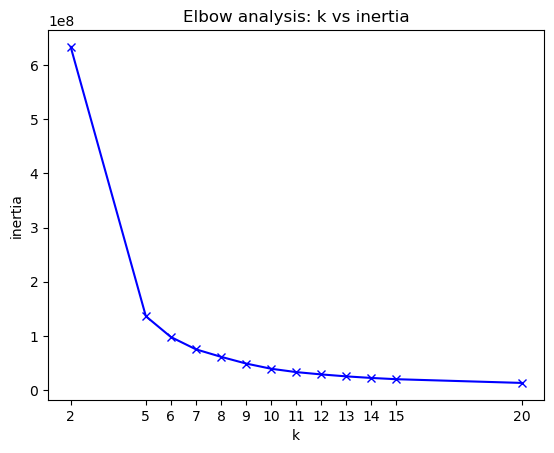

In [102]:
plt.figure()
plt.plot(ks, inertias, 'bx-')
plt.title("Elbow analysis: k vs inertia")
plt.xlabel("k")
plt.xticks(ks)
plt.ylabel("inertia")
plt.show()

### setting k: 8

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2


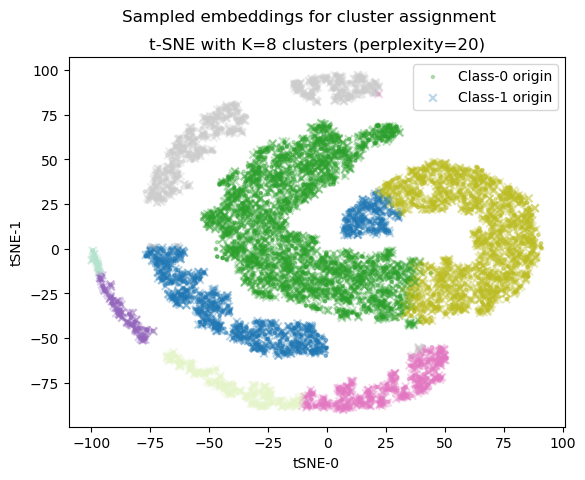

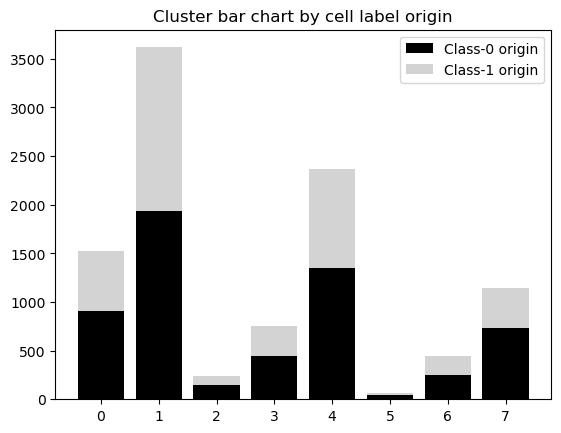

In [110]:
proc_args["k"] = 8
proc_args["mapping_path"] = label_path
proc_args["marker_flag"] = "labels"
proc_raw = K2Processor(proc_args)
proc_raw.fit_quantizer()
proc_raw.visualize_quantizer()

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 34 --> 2


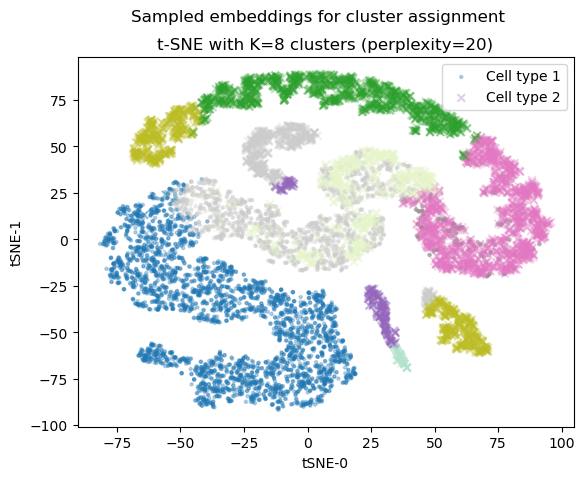

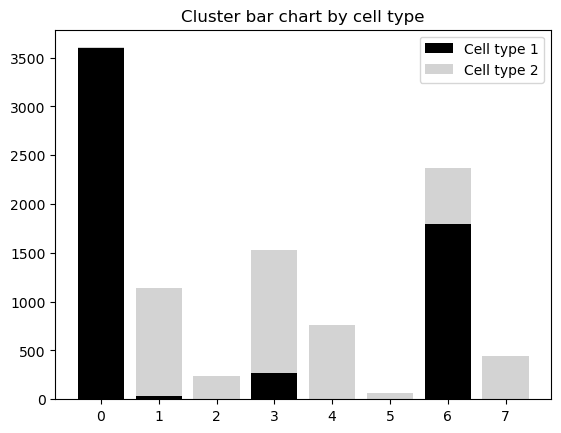

In [115]:
proc_args["k"] = 8
proc_args["mapping_path"] = celltype_path
proc_args["marker_flag"] = "types"
proc_raw = K2Processor(proc_args)
proc_raw.fit_quantizer()
proc_raw.visualize_quantizer()

# Now for concatenated features

In [117]:
proc_args = {"datatype":"cells",
        "k":20,
        "quantizer_type": "kmeans",
        "embeddings_path": "/scr/biggest/gmachi/datasets/celldive_lung/concat_sample.obj",
        "embeddings_type": "multidict",
        "mapping_path": None,
        "sample_size": 10160,
        "sample_scheme": "random",
        "dataset_path": None,
        "verbosity": "full",
        "so_dict_path": None,
        "mapping_path": label_path,
        "marker_flag": "labels"}

In [119]:
import matplotlib.pyplot as plt
ks = [2,5,6,7,8,9,10,11,12,13,14,15,20]

inertias = []
for k in ks:
    proc_args["k"] = k
    proc_concat = K2Processor(proc_args)
    proc_concat.fit_quantizer()
    inertias.append(proc_concat.quantizer.inertia_)

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2
Embeddings path provided, loading 

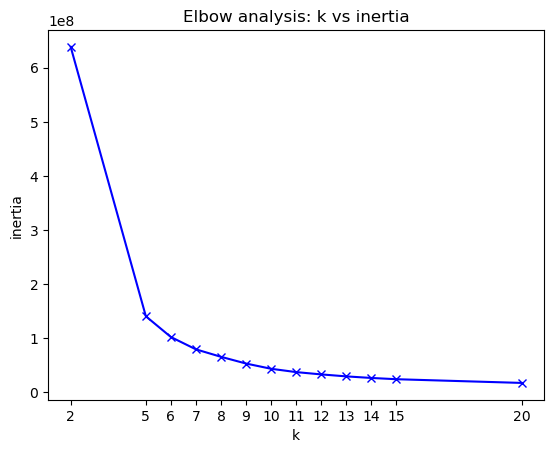

In [120]:
plt.figure()
plt.plot(ks, inertias, 'bx-')
plt.title("Elbow analysis: k vs inertia")
plt.xlabel("k")
plt.xticks(ks)
plt.ylabel("inertia")
plt.show()

### choose k=8

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2


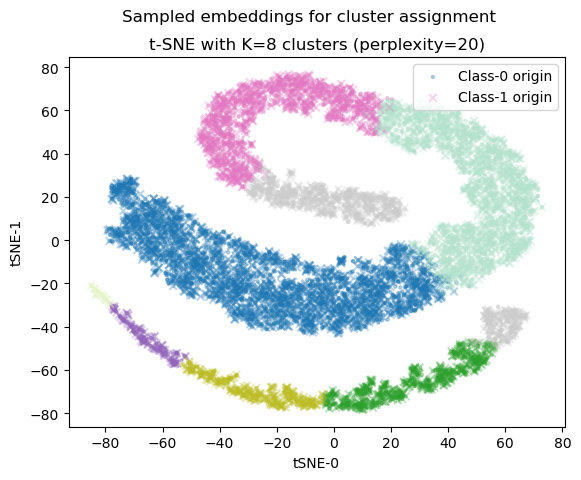

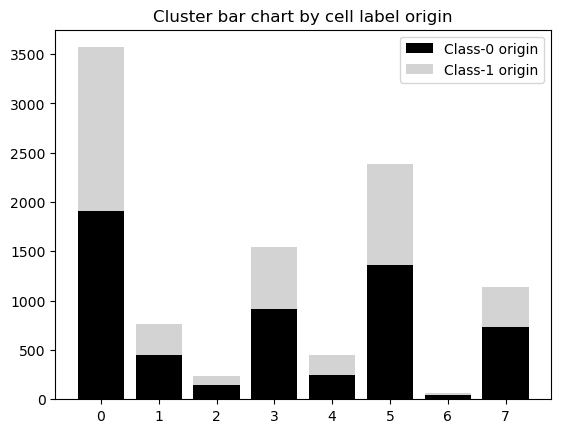

In [123]:
proc_args["k"] = 8
proc_args["mapping_path"] = label_path
proc_args["marker_flag"] = "labels"
proc_concat = K2Processor(proc_args)
proc_concat.fit_quantizer()
proc_concat.visualize_quantizer()

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 546 --> 2


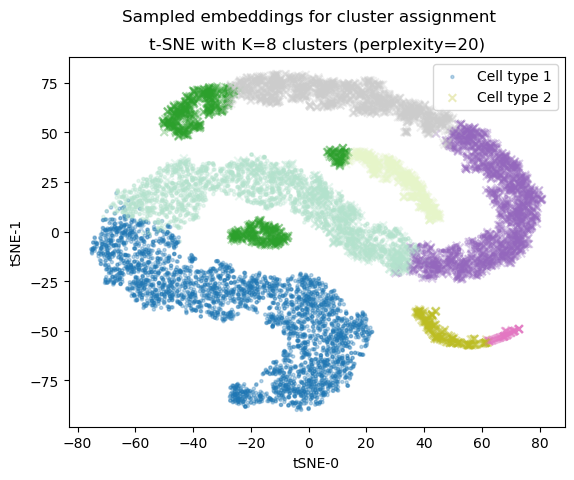

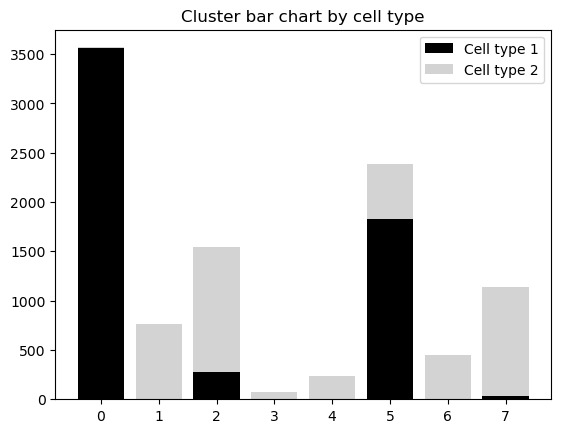

In [124]:
proc_args["k"] = 8
proc_args["mapping_path"] = celltype_path
proc_args["marker_flag"] = "types"
proc_concat = K2Processor(proc_args)
proc_concat.fit_quantizer()
proc_concat.visualize_quantizer()